In [27]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [28]:
df_data = pd.read_csv("process_dataset/01_first_result_balanced.csv")
df_data.head(5)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,19,Female,143,51,1,0,0,0,0,16.978907,...,39.348247,208,7,8,Spain,Europe,Southern Hemisphere,0,138,85
1,33,Male,170,46,1,1,1,0,1,2.210484,...,33.982475,680,1,9,United Kingdom,Europe,Northern Hemisphere,0,166,101
2,85,Male,201,105,0,0,1,1,1,12.466069,...,37.491882,382,1,10,Argentina,South America,Southern Hemisphere,1,107,96
3,37,Female,150,87,0,0,0,0,1,7.893431,...,34.952897,359,0,4,China,Asia,Northern Hemisphere,0,111,67
4,18,Female,233,74,0,1,0,0,1,18.571328,...,39.428916,704,4,5,Thailand,Asia,Northern Hemisphere,0,136,93


##### Distribución de los descriptores binarios

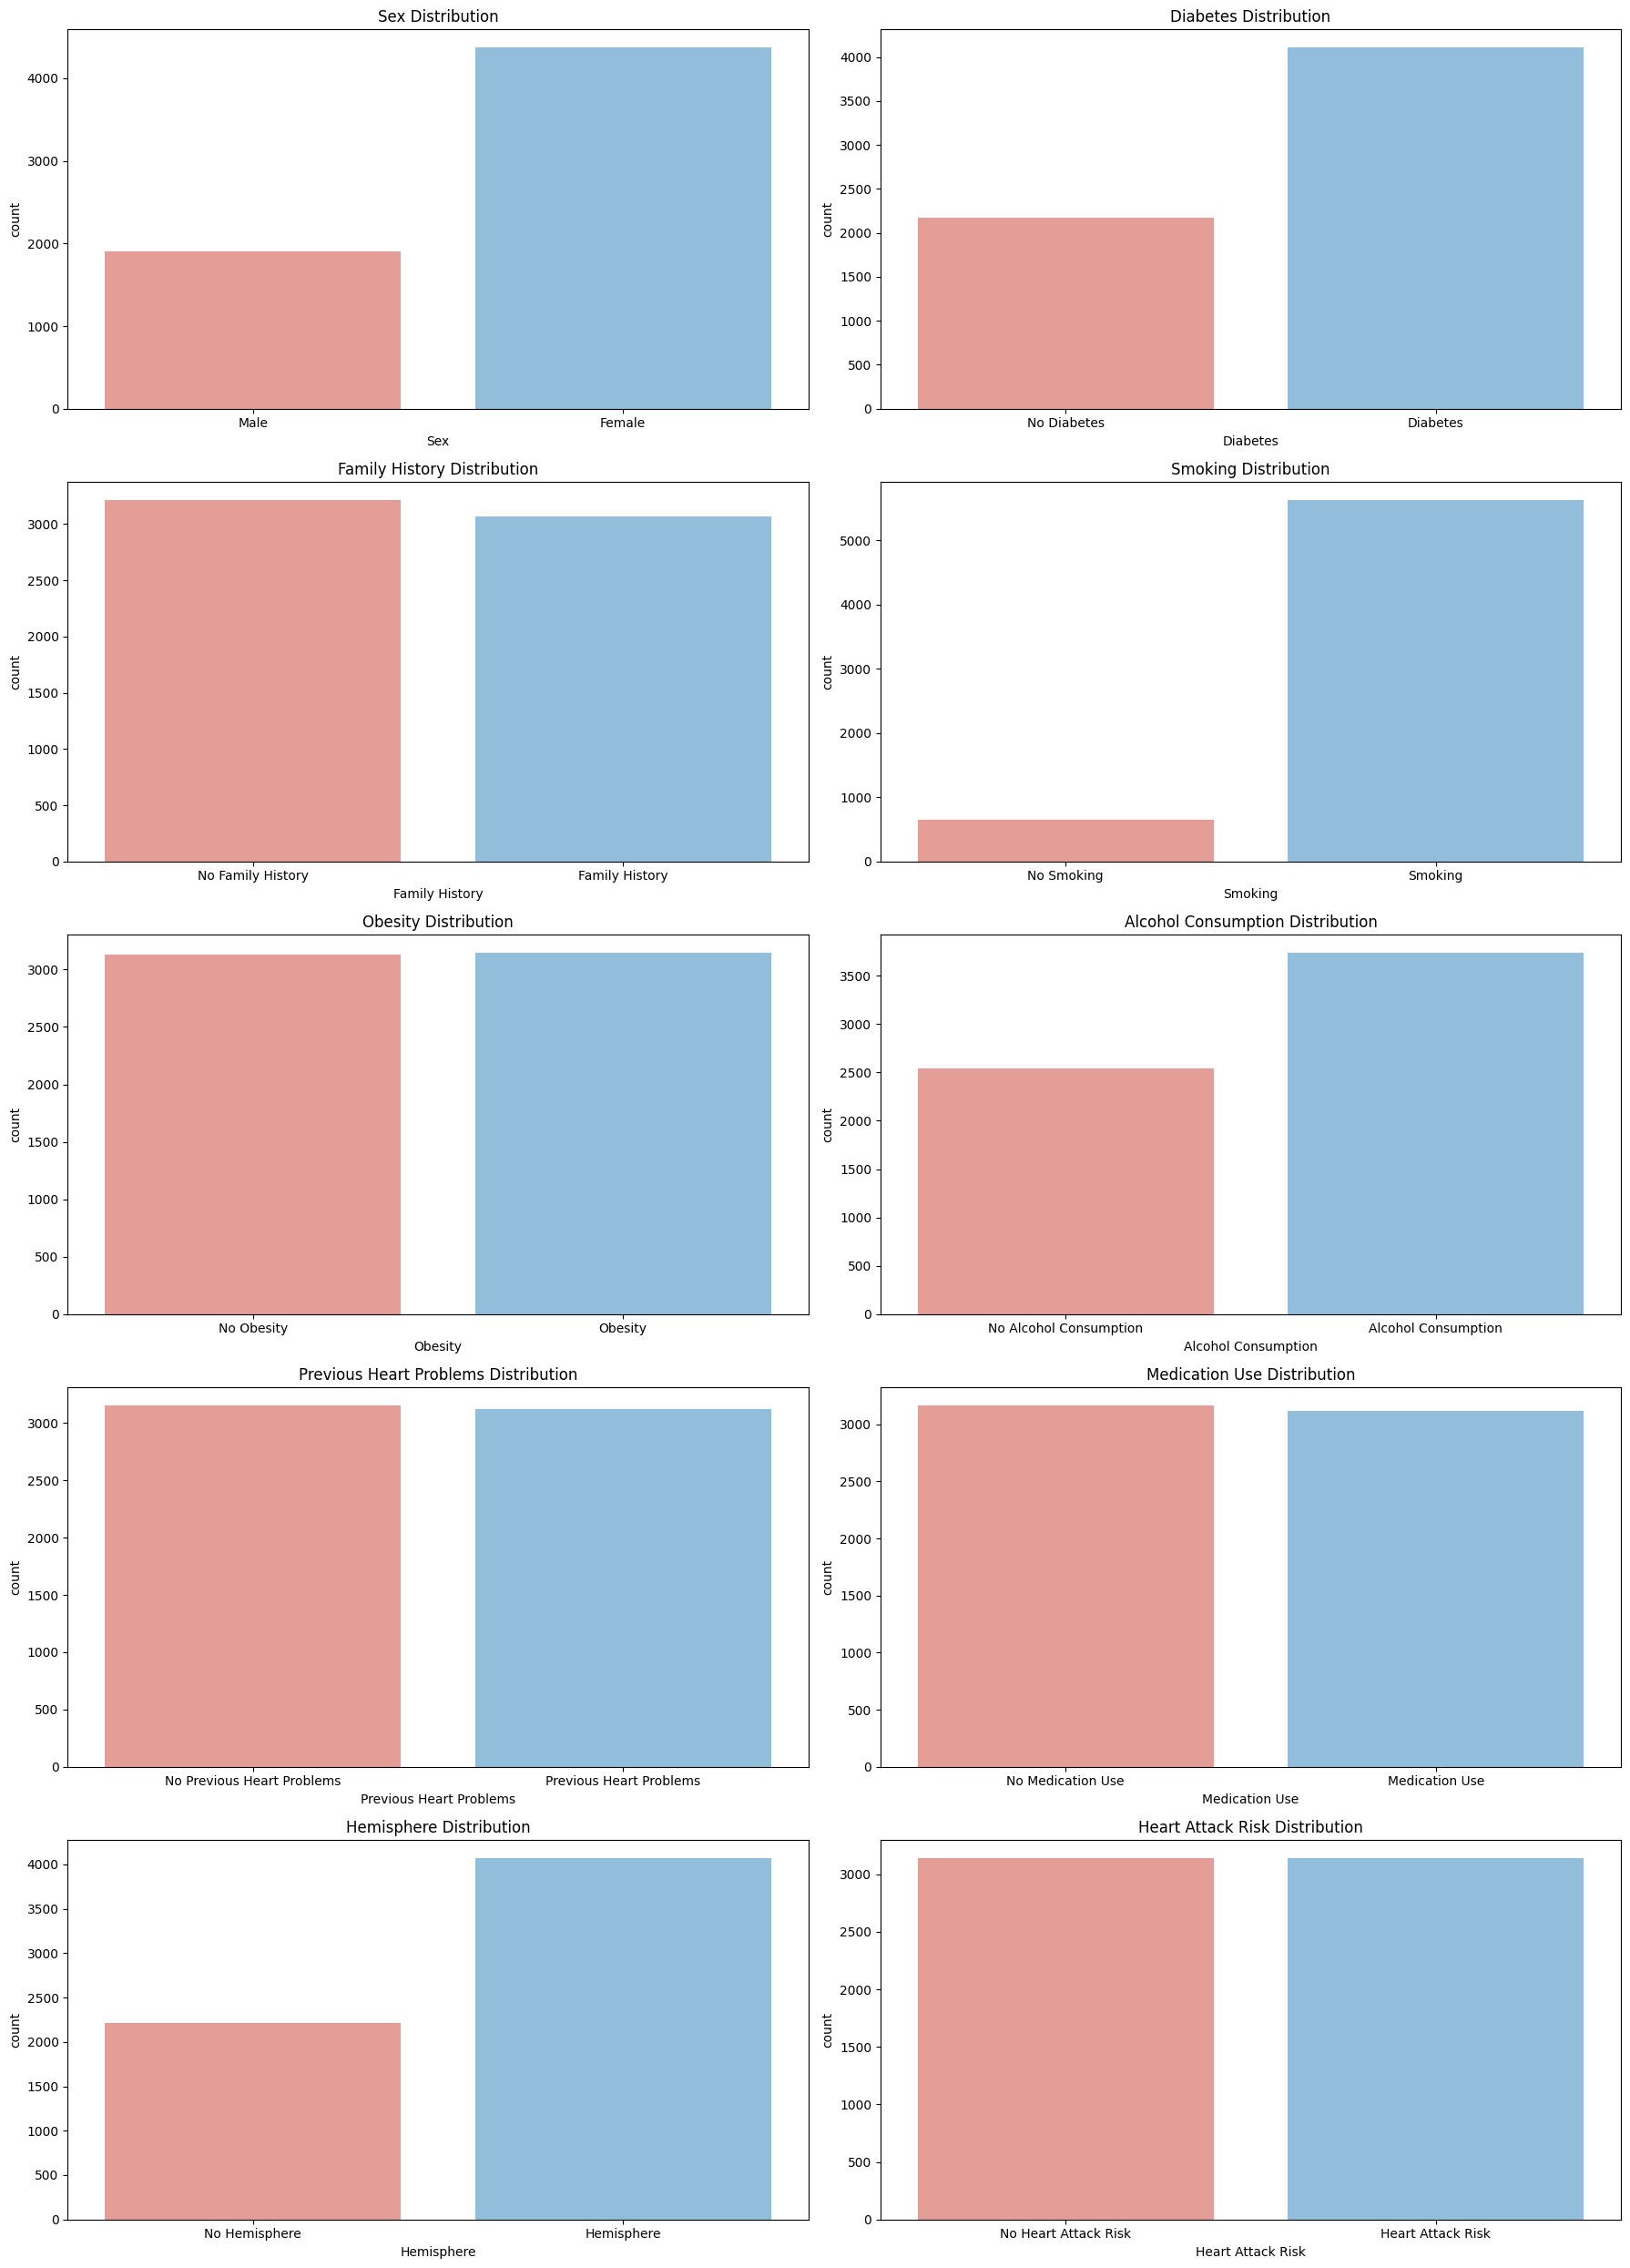

In [29]:
binary_columns = df_data.columns[df_data.nunique() == 2]
non_binary_cols = df_data.columns.difference(binary_columns)

df_binary = df_data[binary_columns]
df_non_binary = df_data[non_binary_cols]

# Configurar el gráfico
n = len(binary_columns) 
rows = (n + 1) // 2
colors = ["#F1948A", "#85C1E9"]
fig, axes = plt.subplots(rows, 2, figsize=(18, 5 * rows))
axes = axes.flatten()

# Generar gráficos de distribución para cada columna binaria
for idx, column in enumerate(binary_columns):
    sns.countplot(data=df_binary, x=column, palette=colors, ax=axes[idx])
    axes[idx].set_title(f'{column} Distribution')

    if column == "Sex":
        axes[idx].set_xticklabels(['Male', 'Female'])
    else:
        axes[idx].set_xticklabels([f'No {column}', column])

plt.tight_layout()
plt.show()

##### Distribución de decriptores numéricos

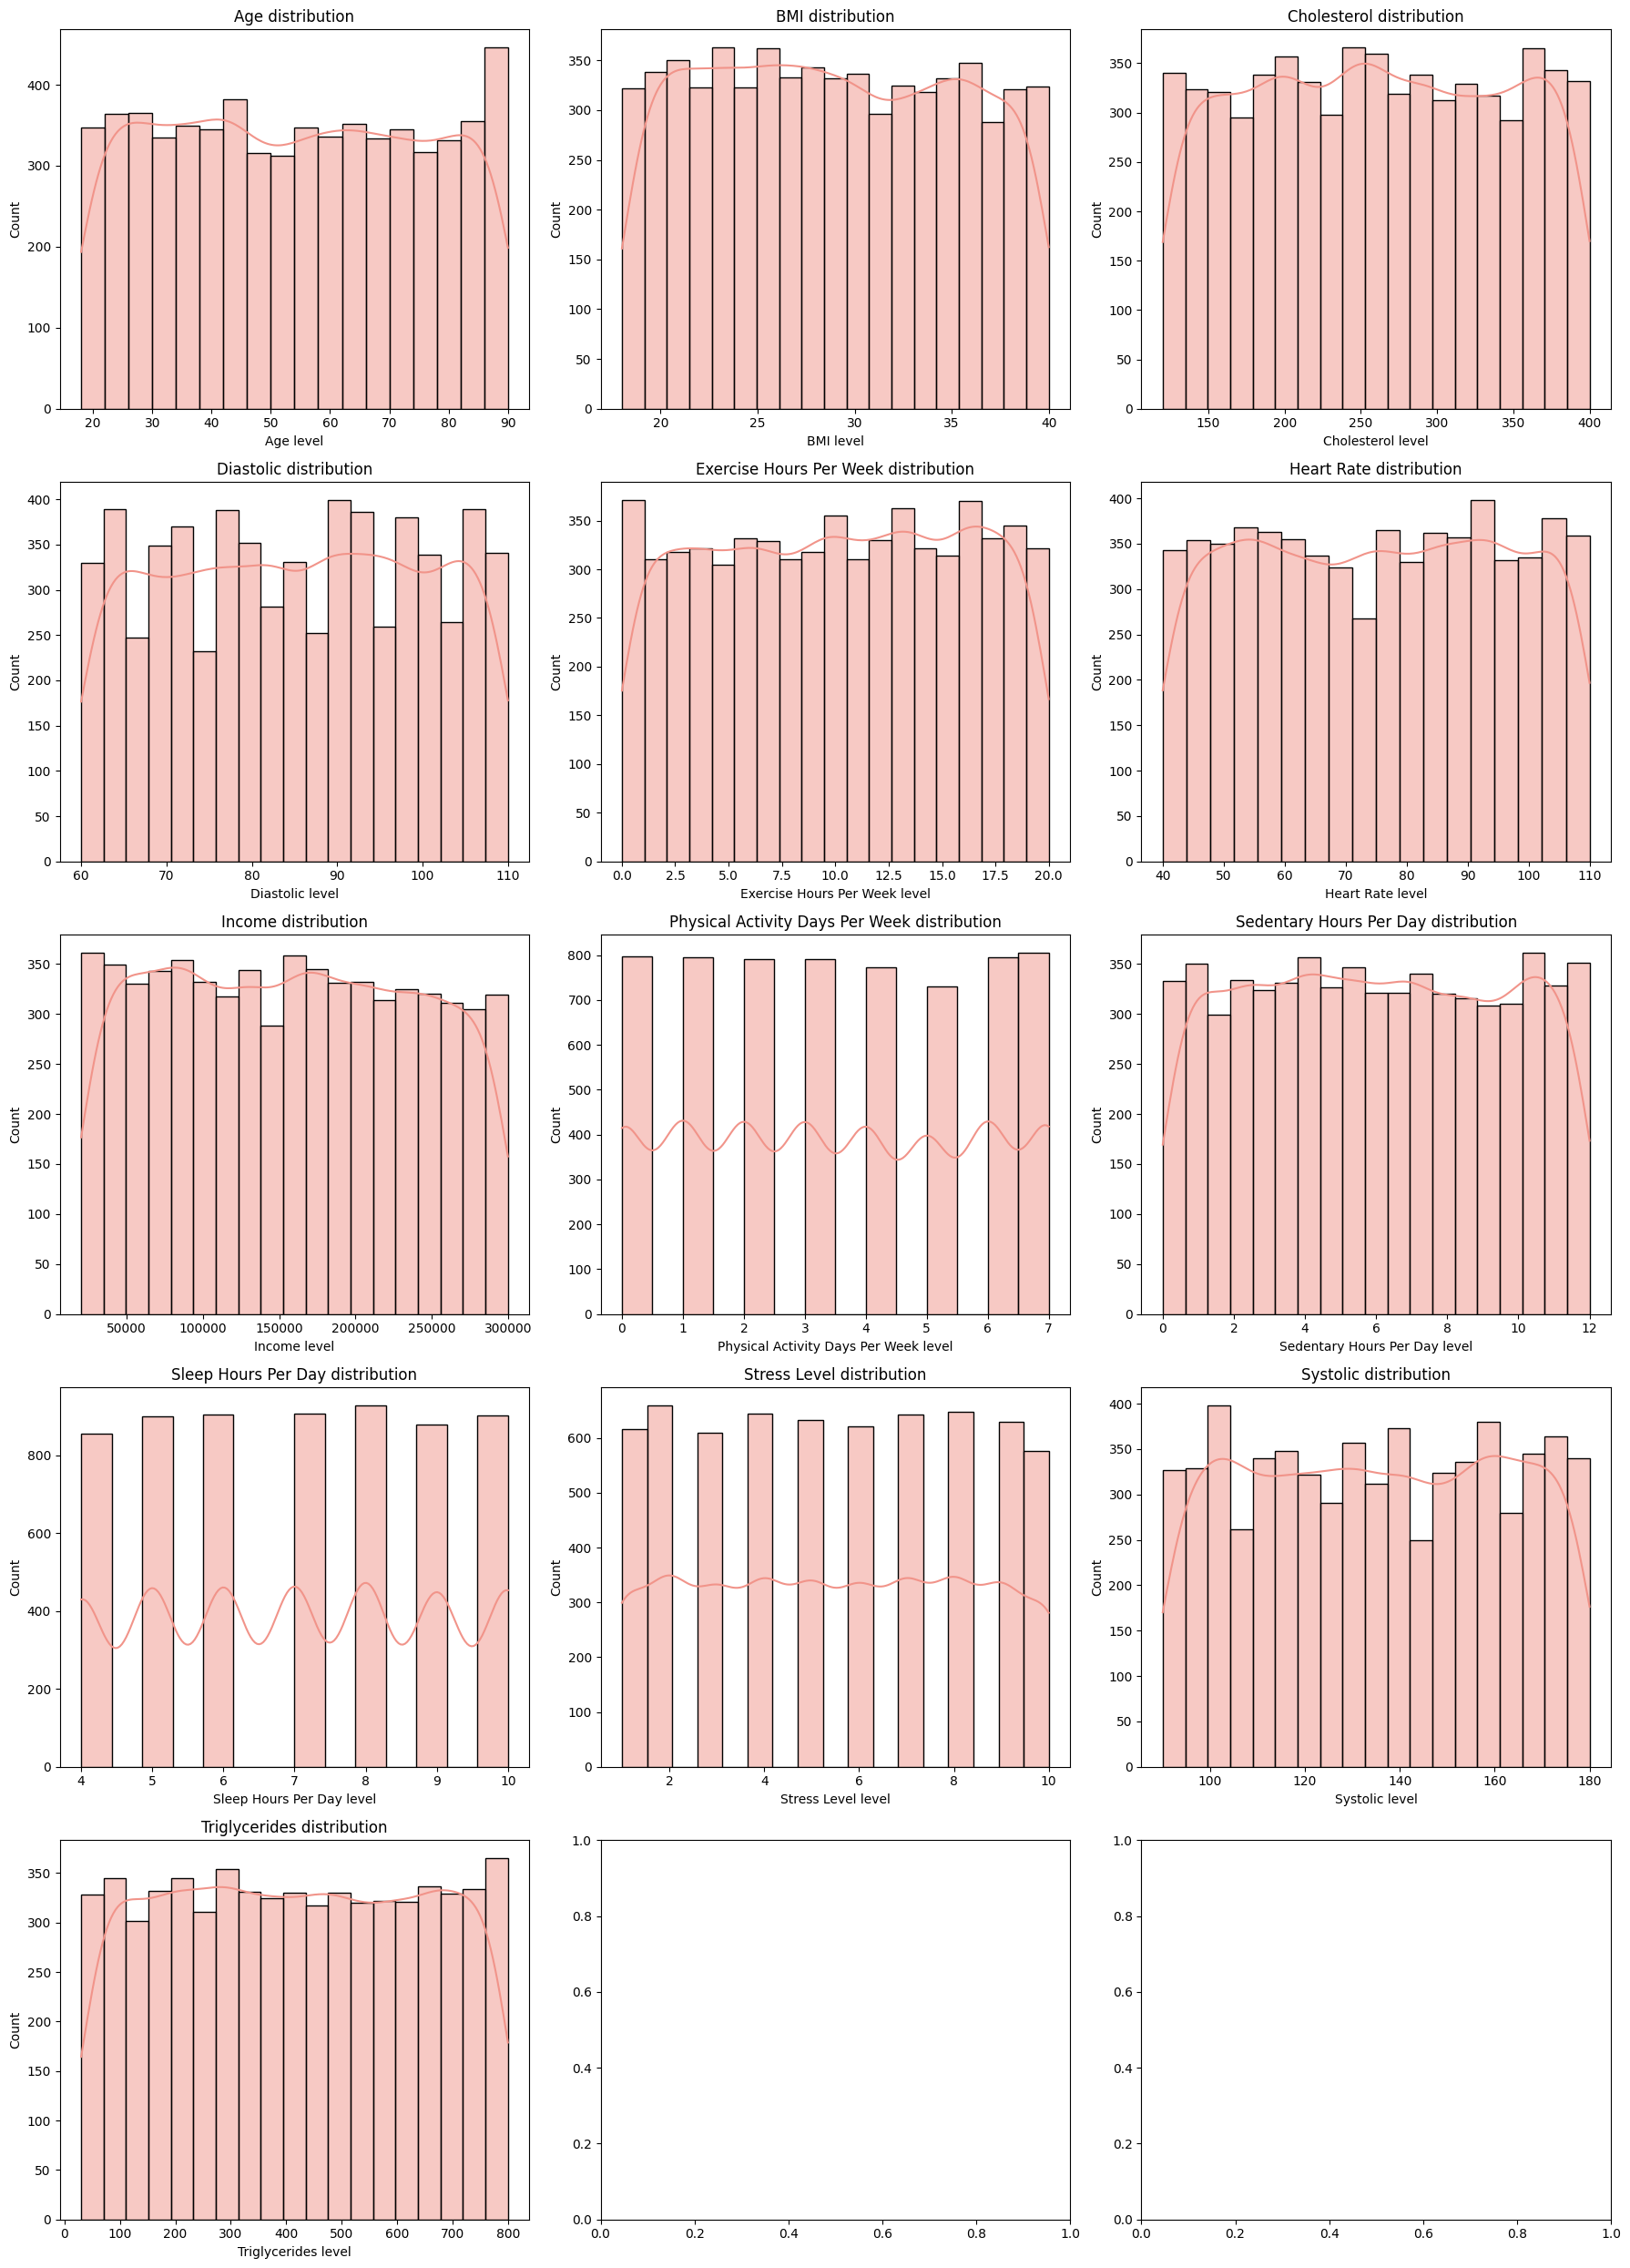

In [30]:
numeric_columns = df_non_binary.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_non_binary.select_dtypes(include=['object']).columns
df_numeric = df_non_binary[numeric_columns]
df_categorical = df_non_binary[categorical_columns]

n = len(numeric_columns)
rows = (n + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_columns):
    sns.histplot(data=df_non_binary, x=col, color="#F1948A", kde=True, ax=axes[idx])
    axes[idx].set_title(f'{col} distribution')
    axes[idx].set_xlabel(f'{col} level')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Distribición de descriptores categoricos

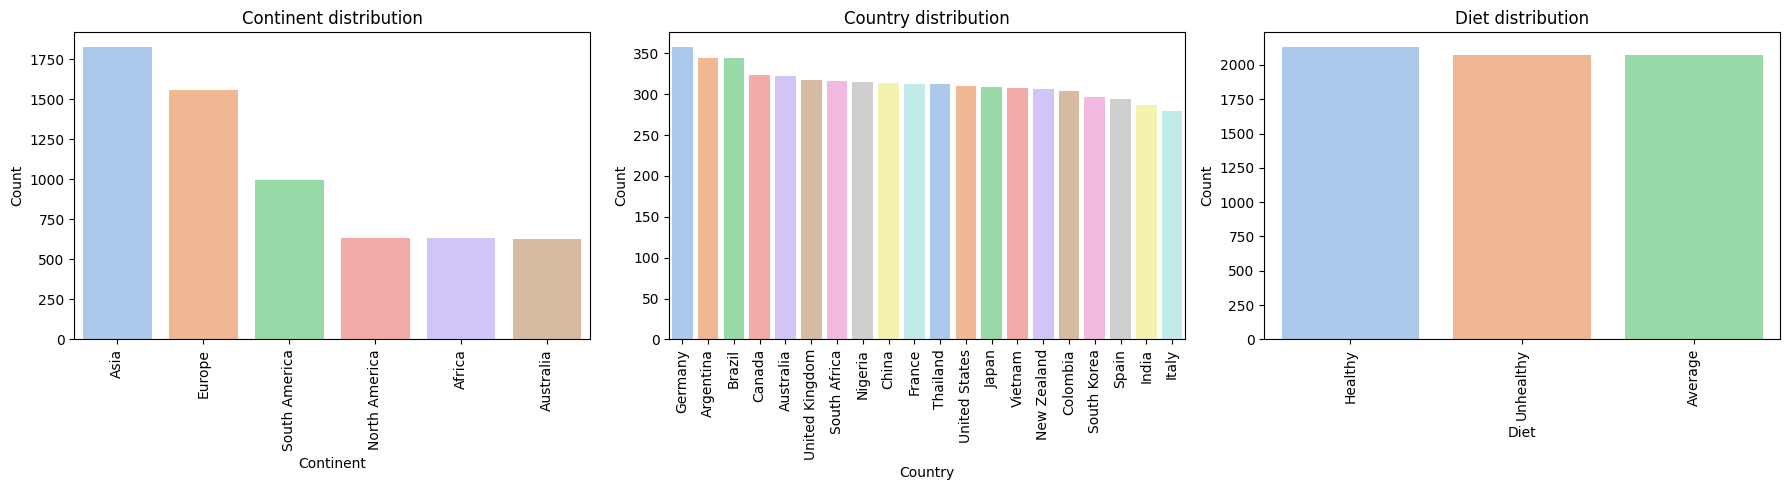

In [31]:
n = len(df_categorical.columns)
rows = (n + 2) // 3 
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for idx, column in enumerate(df_categorical.columns):
    ctg_num = df_categorical[column].value_counts()
    sns.barplot(x=ctg_num.index, y=ctg_num, ax=axes[idx], palette='pastel')
    axes[idx].set_title(f'{column} distribution')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Count')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=90)

for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


#### Distribución de los datos en función de la respuesta (Heart Attack Risk)

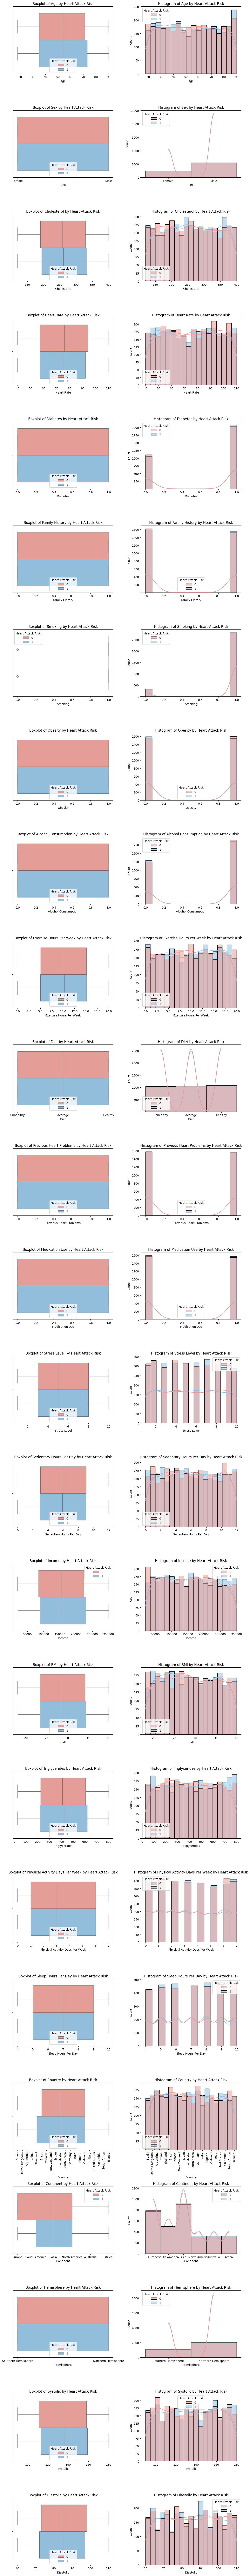

In [32]:
columns_to_plot = df_data.columns.drop("Heart Attack Risk")
n = len(columns_to_plot)
rows = n
fig, axes = plt.subplots(rows, 2, figsize=(12, 5 * rows))
axes = axes.flatten()

for idx, col in enumerate(columns_to_plot):
    # Boxplot
    sns.boxplot(data=df_data, x=col, hue="Heart Attack Risk", palette=colors, ax=axes[idx * 2])
    axes[idx * 2].set_title(f'Boxplot of {col} by Heart Attack Risk')

    if col == "Country":
        axes[idx * 2].tick_params(axis='x', rotation=90)

    # Histograma
    sns.histplot(data=df_data, x=col, hue="Heart Attack Risk", palette=colors, kde=True, ax=axes[idx * 2 + 1])
    axes[idx * 2 + 1].set_title(f'Histogram of {col} by Heart Attack Risk')

    if col == "Country":
        axes[idx * 2 + 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


- En general los datos no muestran descriptores claros que sean diferenciables.
- En el caso del descriptor Smoking, la mayoría de los valores pertenecen a la misma categoria (fumador), esta variable no aporta mucha información para distinguir entre personas con y sin riesgo de ataque cardíaco.
- La información entre los descriptores país, continente y hemisferio podría ser redundante.

##### Eliminar columnas que podrían no son informativas
- **Eliminación del descriptor tabaquismo**
- **Eliminación de los descriptores país y hemisferio**

In [33]:
df_data.drop(["Country", "Hemisphere", "Smoking"], axis=1, inplace=True)
df_data.to_csv("process_dataset/02_second_result.csv", index=False)